In [3]:
import pandas as pd
import json
import geopandas as gpd
import requests
import cartoframes
%matplotlib inline

In [4]:
cc = cartoframes.CartoContext(base_url='https://michellemho-carto.carto.com',api_key='53144e75ea4527ab5b0779ed863bd88433b92678')

In [153]:
study_areas = cc.read('small_study_area', decode_geom=True)

In [154]:
study_areas = gpd.GeoDataFrame(study_areas)
study_areas.drop('description', axis=1, inplace=True)

In [127]:
study_areas.head()

,name,the_geom,geometry
cartodb_id,,,
1,34003001000,0103000020E610000001000000450100001DC87A6AF589...,"POLYGON ((-74.155604 41.02585, -74.154842 41.0..."
5,34003003100,0103000020E610000001000000420000001266DAFE957F...,"POLYGON ((-73.99352999999999 40.927985, -73.99..."
877,36047018700,0103000020E6100000010000000F000000D595CFF23C7E...,"POLYGON ((-73.97247 40.696207, -73.971462 40.6..."
2,34003002100,0103000020E6100000010000000C0100009D7DE5417A7C...,"POLYGON ((-73.94496199999999 40.957477, -73.94..."
3,34003002200,0103000020E6100000010000006B0000008CF4A276BF7D...,"POLYGON ((-73.964811 41.012505, -73.959047 41...."


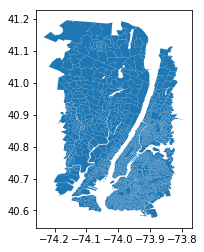

In [128]:
study_areas.plot()

In [129]:
centroids = study_areas.centroid

In [130]:
string = []

In [131]:
for row in centroids.geometry:
    string.append(str(row.x))
    string.append(',')
    string.append(str(row.y))
    string.append(';')

In [132]:
locations = ('').join(string)

In [133]:
locations[:-1]

'-74.13325226888823,41.03317743526813;-73.9866283738373,40.93036371976688;-73.97064045227147,40.694657850361004;-73.92417161042593,40.96423869989786;-73.94276518894397,41.00669951339628;-73.95092460483828,40.993204427330376;-73.99591118422757,40.925174014864055;-74.00473935793838,40.92920187423241;-74.01216555306414,40.91790161069675;-74.00557593694667,40.91534217524735;-73.98898312855911,40.91776327473552;-73.98878934952126,40.828286207294944;-73.89728469904631,40.81967198915409;-74.02940379176114,40.87950627734342;-74.02864894017405,40.87169459796722;-74.06221742365909,40.82547808356143;-73.98655623473267,40.82147995163552;-73.98080103861707,40.826788641135856;-73.99121134955253,40.81389638788077;-73.97499316846556,40.85575355222985;-73.97337886797,40.97475831011491;-73.95963442986277,40.94044541971576;-73.94861860832887,40.9722015951446;-73.97846885604771,40.85364680577699;-73.95676669782094,40.954999204338534;-73.98232823076876,40.94580504113739;-73.99498855180107,40.93987076267553

In [134]:
# may take a few minutes
result = requests.request('get', 'http://127.0.0.1:5000/table/v1/driving/{}'.format(locations[:-1]))

In [147]:
# may take a few minutes
bike_result = requests.request('get', 'http://127.0.0.1:5000/table/v1/bike/{}'.format(locations[:-1]))

In [149]:
durations = result.json()['durations']
bike_durations = bike_result.json()['durations']

In [150]:
durations_df = pd.DataFrame({0:durations})
durations_bike_df = pd.DataFrame({0:bike_durations})

In [ ]:
durations_df[0]

In [155]:
# for testing that it looks OK
for i in [4, 30, 500, 700, 1600, 1900]:
    duration_i = pd.DataFrame(durations)[i]
    duration_bike_i = pd.DataFrame(bike_durations)[i]
    study_areas['duration_{}'.format(i)] = duration_i
    study_areas['bike_duration_{}'.format(i)] = duration_bike_i

In [156]:
study_areas['times_car'] = durations_df
study_areas['times_bike'] = durations_df

In [157]:
study_areas.head()

,name,the_geom,geometry,duration_4,bike_duration_4,duration_30,bike_duration_30,duration_500,bike_duration_500,duration_700,bike_duration_700,duration_1600,bike_duration_1600,duration_1900,bike_duration_1900,times_car,times_bike
cartodb_id,,,,,,,,,,,,,,,,,
1,34003001000,0103000020E610000001000000450100001DC87A6AF589...,"POLYGON ((-74.155604 41.02585, -74.154842 41.0...",773.2,773.2,843.2,843.2,1117.6,1117.6,1092.1,1092.1,1178.6,1178.6,1791.2,1791.2,"[1289.3, 0, 2014.8, 653.5, 773.2, 659.2, 132.6...","[1289.3, 0, 2014.8, 653.5, 773.2, 659.2, 132.6..."
5,34003003100,0103000020E610000001000000420000001266DAFE957F...,"POLYGON ((-73.99352999999999 40.927985, -73.99...",241.2,241.2,1359.2,1359.2,1596.2,1596.2,1570.7,1570.7,1657.2,1657.2,2269.8,2269.8,"[1311.9, 662.3, 2493.4, 639.9, 241.2, 0, 648.6...","[1311.9, 662.3, 2493.4, 639.9, 241.2, 0, 648.6..."
877,36047018700,0103000020E6100000010000000F000000D595CFF23C7E...,"POLYGON ((-73.97247 40.696207, -73.971462 40.6...",3030.7,3030.7,2493.8,2493.8,1688.4,1688.4,2042.0,2042.0,1544.8,1544.8,1276.3,1276.3,"[3141.4, 2463.3, 636.1, 2627.5, 3030.7, 2916.7...","[3141.4, 2463.3, 636.1, 2627.5, 3030.7, 2916.7..."
2,34003002100,0103000020E6100000010000000C0100009D7DE5417A7C...,"POLYGON ((-73.94496199999999 40.957477, -73.94...",2582.3,2582.3,2133.4,2133.4,1240.0,1240.0,1593.6,1593.6,1226.0,1226.0,658.9,658.9,"[2781, 2014.9, 0, 2179.1, 2582.3, 2468.3, 1914...","[2781, 2014.9, 0, 2179.1, 2582.3, 2468.3, 1914..."
3,34003002200,0103000020E6100000010000006B0000008CF4A276BF7D...,"POLYGON ((-73.964811 41.012505, -73.959047 41....",705.6,705.6,1381.6,1381.6,1285.5,1285.5,1260.0,1260.0,1346.5,1346.5,1959.1,1959.1,"[1476.4, 649, 2182.7, 0, 705.6, 639, 671, 696,...","[1476.4, 649, 2182.7, 0, 705.6, 639, 671, 696,..."


/Users/michelleho/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


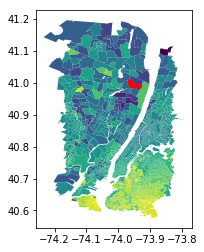

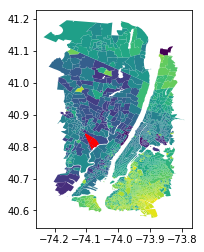

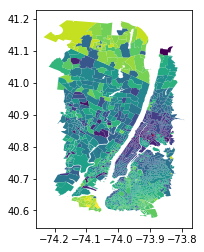

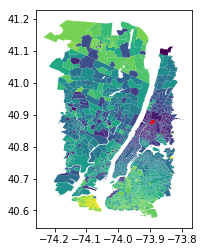

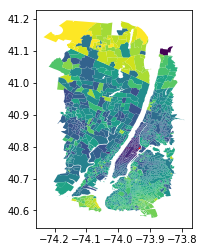

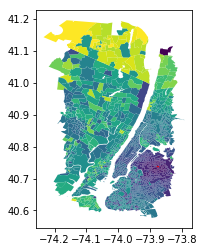

In [143]:
for i in [4, 30, 500, 700, 1600, 1900]:
    base = study_areas.plot(column='duration_{}'.format(i))
    source = study_areas[study_areas.index == i]
    source.plot(ax=base, color='red', markersize=5);

/Users/michelleho/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


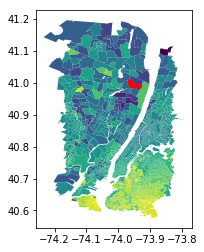

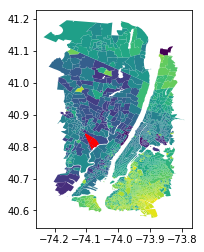

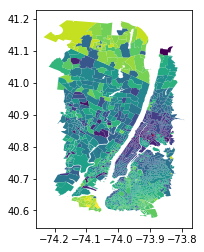

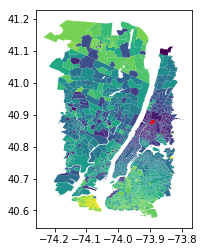

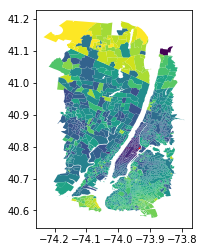

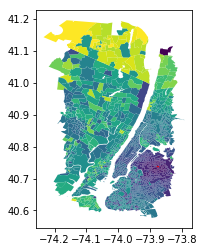

In [159]:
for i in [4, 30, 500, 700, 1600, 1900]:
    base = study_areas.plot(column='bike_duration_{}'.format(i))
    source = study_areas[study_areas.index == i]
    source.plot(ax=base, color='red', markersize=5);

In [160]:
study_areas.drop(['duration_{}'.format(i) for i in [4, 30, 500, 700, 1600, 1900]], axis=1, inplace=True)
study_areas.drop(['bike_duration_{}'.format(i) for i in [4, 30, 500, 700, 1600, 1900]], axis=1, inplace=True)

In [161]:
study_areas.head()

,name,the_geom,geometry,times_car,times_bike
cartodb_id,,,,,
1,34003001000,0103000020E610000001000000450100001DC87A6AF589...,"POLYGON ((-74.155604 41.02585, -74.154842 41.0...","[1289.3, 0, 2014.8, 653.5, 773.2, 659.2, 132.6...","[1289.3, 0, 2014.8, 653.5, 773.2, 659.2, 132.6..."
5,34003003100,0103000020E610000001000000420000001266DAFE957F...,"POLYGON ((-73.99352999999999 40.927985, -73.99...","[1311.9, 662.3, 2493.4, 639.9, 241.2, 0, 648.6...","[1311.9, 662.3, 2493.4, 639.9, 241.2, 0, 648.6..."
877,36047018700,0103000020E6100000010000000F000000D595CFF23C7E...,"POLYGON ((-73.97247 40.696207, -73.971462 40.6...","[3141.4, 2463.3, 636.1, 2627.5, 3030.7, 2916.7...","[3141.4, 2463.3, 636.1, 2627.5, 3030.7, 2916.7..."
2,34003002100,0103000020E6100000010000000C0100009D7DE5417A7C...,"POLYGON ((-73.94496199999999 40.957477, -73.94...","[2781, 2014.9, 0, 2179.1, 2582.3, 2468.3, 1914...","[2781, 2014.9, 0, 2179.1, 2582.3, 2468.3, 1914..."
3,34003002200,0103000020E6100000010000006B0000008CF4A276BF7D...,"POLYGON ((-73.964811 41.012505, -73.959047 41....","[1476.4, 649, 2182.7, 0, 705.6, 639, 671, 696,...","[1476.4, 649, 2182.7, 0, 705.6, 639, 671, 696,..."


In [164]:
study_areas.to_csv('durations_to_areas')

In [162]:
cc.write(study_areas, 'durations_to_areas', overwrite=True)

/Users/michelleho/anaconda3/lib/python3.6/site-packages/carto/resources.py:90: FutureWarning: This is part of a non-public CARTO API and may change in the future. Take this into account if you are using this in a production environment
  warnings.warn('This is part of a non-public CARTO API and may change in the future. Take this into account if you are using this in a production environment', FutureWarning)
/Users/michelleho/Work/proj/cartoframes/cartoframes/context.py:570: UserWarning: DataFrame written to CARTO but the table schema failed to update to match DataFrame. All columns in CARTO table have data type `text`. CARTO error: `['syntax error at end of input']`.
  err=err))


Table successfully written to CARTO: https://michellemho-carto.carto.com/dataset/durations_to_areas


In [11]:
durations_to_areas = cc.read('durations_to_areas')

In [27]:
def replace_brackets(string):
    return string.replace('[','{').replace(']','}')

In [33]:
durations_to_areas['times_car'] = durations_to_areas.times_car.apply(replace_brackets)
durations_to_areas['times_bike'] = durations_to_areas.times_bike.apply(replace_brackets)

In [36]:
cc.write(durations_to_areas, 'durations_to_areas', overwrite=True)

/Users/michelleho/anaconda3/lib/python3.6/site-packages/carto/resources.py:90: FutureWarning: This is part of a non-public CARTO API and may change in the future. Take this into account if you are using this in a production environment
  warnings.warn('This is part of a non-public CARTO API and may change in the future. Take this into account if you are using this in a production environment', FutureWarning)


Table successfully written to CARTO: https://michellemho-carto.carto.com/dataset/durations_to_areas
